# DATASET

---



---



In [ ]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
import matplotlib.pyplot as plt


x_cols = ['sbp','tobacco','ldl','adiposity','famhist','typea','obesity','alcohol','age']
y_cols = ['chd']
x = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv",usecols=x_cols)
y = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv",usecols=y_cols)
data = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv")

#Grab columns from second until second to last
X = data.iloc[:, 1:10].values
#Grab the last target column
Y = data.iloc[:, -1].values

#PERCENTAGE OF CLASS 0 AND 1

---



---

In [ ]:
# Check for percentages of class 1 and 0
print(f'Percentage of class 0 is: {(y[y.chd == 0].shape[0] / y.shape[0]) * 100}%')
print(f'Percentage of class 1 is: {(y[y.chd == 1].shape[0] / y.shape[0]) * 100}%')

Percentage of class 0 is: 65.36796536796537%
Percentage of class 1 is: 34.63203463203463%


#NUMBER OF MISSING VALUES

---



---



In [ ]:
# Check for missing values
print(x.isnull().sum())

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
dtype: int64


#CATEGORICAL VARIABLES

---



---




In [ ]:
# Check for number of categorical variables
print(x.dtypes)
print("The only categorical variable present in the datasset is the family history (famhist) that is either present or absent. \n")

sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist       object
typea          int64
obesity      float64
alcohol      float64
age            int64
dtype: object
The only categorical variable present in the datasset is the family history (famhist) that is either present or absent. 



#MAXIMUM CORRELATION

---



---




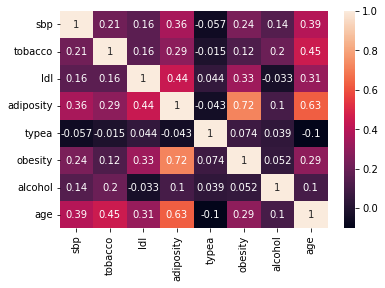

sbp        sbp          1.000000
adiposity  obesity      0.716556
age        adiposity    0.625954
tobacco    age          0.450330
adiposity  ldl          0.440432
age        sbp          0.388771
sbp        adiposity    0.356500
obesity    ldl          0.330506
ldl        age          0.311799
obesity    age          0.291777
adiposity  tobacco      0.286640
obesity    sbp          0.238067
sbp        tobacco      0.212247
tobacco    alcohol      0.200813
           ldl          0.158905
ldl        sbp          0.158296
alcohol    sbp          0.140096
tobacco    obesity      0.124529
alcohol    age          0.101125
           adiposity    0.100330
obesity    typea        0.074006
alcohol    obesity      0.051620
ldl        typea        0.044048
alcohol    typea        0.039498
typea      tobacco     -0.014608
alcohol    ldl         -0.033403
typea      adiposity   -0.043144
sbp        typea       -0.057454
age        typea       -0.102606


In [ ]:
# Maximum Correlation
corr_matrix = x.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

sorted_corr_matrix = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates()
print(sorted_corr_matrix.to_string())

#ONE-HOT-ENCODING

---



---



In [ ]:
# One-Hot-Encoding
x = pd.get_dummies(x,columns=['famhist'],drop_first=True)
print(x)

     sbp  tobacco    ldl  adiposity  typea  obesity  alcohol  age  \
0    160    12.00   5.73      23.11     49    25.30    97.20   52   
1    144     0.01   4.41      28.61     55    28.87     2.06   63   
2    118     0.08   3.48      32.28     52    29.14     3.81   46   
3    170     7.50   6.41      38.03     51    31.99    24.26   58   
4    134    13.60   3.50      27.78     60    25.99    57.34   49   
..   ...      ...    ...        ...    ...      ...      ...  ...   
457  214     0.40   5.98      31.72     64    28.45     0.00   58   
458  182     4.20   4.41      32.10     52    28.61    18.72   52   
459  108     3.00   1.59      15.23     40    20.09    26.64   55   
460  118     5.40  11.61      30.79     64    27.35    23.97   40   
461  132     0.00   4.82      33.41     62    14.70     0.00   46   

     famhist_Present  
0                  1  
1                  0  
2                  1  
3                  1  
4                  1  
..               ...  
457       

#STANDARDIZATION

---



---



In [ ]:
# Grab all the columns except the categorical one
meanOfColumns = x.loc[:,x.columns!='famhist_Present'].mean()
stdOfColumns = x.loc[:,x.columns!='famhist_Present'].std()

# Standardize the features
standardizedX = (x.loc[:,x.columns!='famhist_Present'] - meanOfColumns)/stdOfColumns

# Insert bias column
standardizedX.insert(loc=0,column="biasCol",value=1)

# Add the categorical feature back to the standardized dataset and print
standardizedX['famhist_Present'] = x['famhist_Present']
print(standardizedX)

     biasCol       sbp   tobacco       ldl  adiposity     typea   obesity  \
0          1  1.057417  1.821099  0.477894  -0.295183 -0.418017 -0.176594   
1          1  0.276789 -0.789382 -0.159507   0.411694  0.193134  0.670646   
2          1 -0.991731 -0.774141 -0.608585   0.883374 -0.112441  0.734723   
3          1  1.545310  0.841352  0.806252   1.622382 -0.214300  1.411091   
4          1 -0.211103  2.169453 -0.598928   0.305020  0.702427 -0.012842   
..       ...       ...       ...       ...        ...       ...       ...   
457        1  3.692037 -0.704470  0.598614   0.811401  1.109862  0.570971   
458        1  2.130781  0.122871 -0.159507   0.860240 -0.112441  0.608942   
459        1 -1.479624 -0.138395 -1.521228  -1.307946 -1.334744 -1.413043   
460        1 -0.991731  0.384137  3.317227   0.691875  1.109862  0.309916   
461        1 -0.308682 -0.791559  0.038474   1.028605  0.906144 -2.692210   

      alcohol       age  famhist_Present  
0    3.274189  0.628654         

# Hypothesis (Model)

---



---



In [ ]:
import math

def sigmoid(theta,x):
  z = np.dot(x,np.transpose(theta))
  p = 1/(1 + np.exp(-z))
  return p

#COST FUNCTION

---



---



In [ ]:
import math

def computeCost(actual,predicted,numSamples):
  cost = (-1/numSamples) * (np.dot(actual,np.log(predicted)) + np.dot((1 - actual),np.log(1- predicted)))
  return cost

#Batch Gradient Descent Function

---



---



In [ ]:
def batchGradientDescent(x,y_act,batchNum,learningRate,epoch):
  costList = []
  thetaList = []

  # Initializing constant ten theta values in the range of 0 to 1.
  random.seed(123)
  theta = [random.random() for x in range(10)]
  theta = np.array(theta)

  # First compute predicted y's, then calculate the new coefficient values, then compute the cost and repeat.
  for i in range(epoch):
    y_pred = sigmoid(theta,x)

    theta = theta + learningRate * (1/batchNum) * (np.dot(np.transpose(x),np.subtract(y_act,y_pred)))
    thetaList.append(theta)

    cost = computeCost(y_act,y_pred,batchNum)
    costList.append(cost)


  # Print the values of the intercept, coefficients, and the final cost
  print("This is the intercept: ",thetaList[len(thetaList)-1][0])
  print("These are the 9 thetas: ",thetaList[len(thetaList)-1][1:10])
  print("This is the final value of the cost: ",costList[len(costList)-1])

  # Plot the graphs
  plt.title('cost vs num of epochs graph')
  plt.xlabel(f'{epoch} epochs')
  plt.ylabel('cost')
  plt.plot(range(1,(epoch+1)),costList)

# Mini-Batch Gradient Descent Function

---



---



In [ ]:


def miniBatchGradientDescent(x,y_act,batchNum,learningRate,epoch):
  costList = []
  thetaList = []

  # Initializing constant ten theta values in the range of 0 to 1.
  random.seed(123)
  theta = [random.random() for x in range(10)]
  theta = np.array(theta)

  for i in range(epoch):
    # two pointers to keep track of the mini batches
    # Will reset after each epoch
    a = 0
    b = batchNum

    # number of samples equal to 462 minus the first 50 mini batch
    numSamples = 412

    # shuffle all the rows so the mini batches are different each epoch
    np.random.shuffle(x)

    while (numSamples >= 0):
      
      y_pred = sigmoid(theta,x[a:b])

      theta = theta + learningRate * (1/batchNum) * (np.dot(np.transpose(x[a:b]),np.subtract(y_act[a:b],y_pred)))
      
      cost = computeCost(y_act[a:b],y_pred,batchNum)

      # If all samples are used, break out of the loop.
      if (numSamples == 0):
        break

      # Verify number of samples will not go below 0
      # If numSamples - batchNum < 0, then add 50 (batchNum) to a (first pointer) and leftover numSamples to b
      # final mini batch will be indices 450 to 461 (12 samples)
      if(numSamples - batchNum < 0):
        a += batchNum
        b += numSamples
        numSamples -= numSamples
      else:
        a += batchNum
        b += batchNum 
        numSamples -= 50

    costList.append(cost)
    thetaList.append(theta)

  # Print the values of the intercept, coefficients, and the final cost
  print("This is the intercept: ",thetaList[len(thetaList)-1][0])
  print("These are the 9 thetas: ",thetaList[len(thetaList)-1][1:10])
  print("This is the final value of the cost: ",costList[len(costList)-1])

  # Plot the graph of cost
  plt.title('cost vs num of epochs graph')
  plt.xlabel(f'{epoch} epoch')
  plt.ylabel('cost')
  plt.plot(range(1,(epoch + 1)),costList)

# Running Gradient Descent


---



---



# running gradient descent for 500 epochs with 0.0001 learning rate

---



---



This is the intercept:  0.04299153658395821
These are the 9 thetas:  [0.08440291 0.40573178 0.106128   0.89227124 0.04111696 0.52766027
 0.32883662 0.84726472 0.15666704]
This is the final value of the cost:  0.8010607838963995


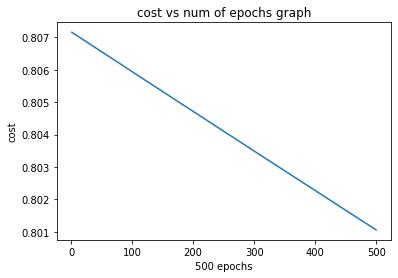

In [ ]:
standardizedX = standardizedX.to_numpy()
batchGradientDescent(standardizedX,Y,462,0.0001,500)

# running gradient descent for 1000 epochs with 0.0001 learning rate

---



---



This is the intercept:  0.03369315530364843
These are the 9 thetas:  [0.08165213 0.40422829 0.10459227 0.88340415 0.04405998 0.51916863
 0.32549526 0.84248338 0.15371426]
This is the final value of the cost:  0.7950449136771883


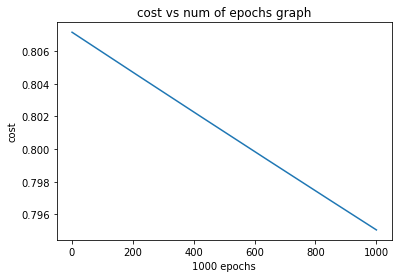

In [ ]:
batchGradientDescent(standardizedX,Y,462,0.0001,1000)

# running gradient descent for 10000 epochs with 0.0001 learning rate

---



---



This is the intercept:  -0.12066052628579764
These are the 9 thetas:  [0.038296   0.37863689 0.08348176 0.73512643 0.09340577 0.37579146
 0.26904686 0.76401346 0.10809371]
This is the final value of the cost:  0.7023725799798183


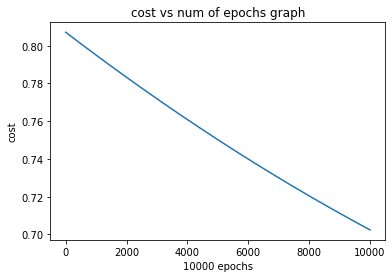

In [ ]:
batchGradientDescent(standardizedX,Y,462,0.0001,10000)

# running gradient descent for 500 epochs with 0.001 learning rate

---



---



This is the intercept:  -0.037998263179076855
These are the 9 thetas:  [0.06088867 0.3924714  0.09365259 0.81474861 0.06685775 0.45313217
 0.29950801 0.80576191 0.1316511 ]
This is the final value of the cost:  0.7502913042095855


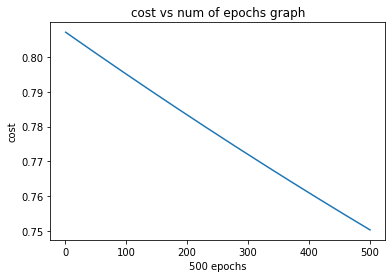

In [ ]:
batchGradientDescent(standardizedX,Y,462,0.001,500)

# running gradient descent for 1000 epochs with 0.001 learning rate

---



---



This is the intercept:  -0.12067300754016157
These are the 9 thetas:  [0.03829013 0.37863537 0.08347573 0.73511529 0.09340933 0.375782
 0.26904313 0.76400611 0.10808656]
This is the final value of the cost:  0.7024438369295919


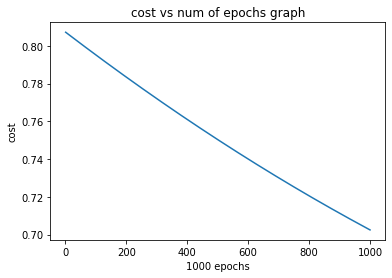

In [ ]:
batchGradientDescent(standardizedX,Y,462,0.001,1000)

# running gradient descent for 10000 epochs with 0.001 learning rate

---



---



This is the intercept:  -0.7272113387805235
These are the 9 thetas:  [ 0.04312991  0.32666215  0.23081058  0.24100503  0.30294227 -0.15684099
  0.04954051  0.59884361  0.1546043 ]
This is the final value of the cost:  0.5296919314158957


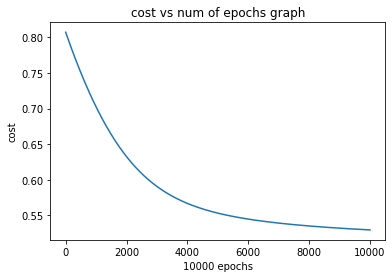

In [ ]:
batchGradientDescent(standardizedX,Y,462,0.001,10000)

# Verification 

---



---



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import seaborn as sns 

xWithNoBias = standardizedX[:,1:]
x_train, x_test, y_train, y_test = train_test_split(xWithNoBias, Y, test_size=0.2, random_state=0)
logreg =  LogisticRegression(solver='liblinear') 
scaler = preprocessing.StandardScaler().fit(x_train)
classifier = (LogisticRegression())
X_scaled = scaler.transform(x_train)
classifier.fit(X_scaled,y_train) 

print(classifier.coef_)
print(classifier.intercept_)

[[ 0.04537543  0.45726661  0.27666393  0.25546918  0.51365354 -0.35154347
  -0.03888021  0.68317204  0.38935767]]
[-0.87319954]


#Running mini-batch gradient descent for 500 epochs with 0.0001 learning rate

---



---



This is the intercept:  -0.030619773303663972
These are the 9 thetas:  [0.02208619 0.32992757 0.0390195  0.76777359 0.04195661 0.43893908
 0.28797871 0.72998266 0.10528908]
This is the final value of the cost:  0.33939804330740253


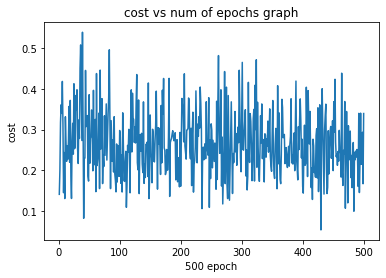

In [ ]:
miniBatchGradientDescent(standardizedX,Y,50,0.0001,500)

#Running mini-batch gradient descent for 1000 epochs with 0.0001 learning rate

---



---



This is the intercept:  -0.10485189273516064
These are the 9 thetas:  [-0.03362891  0.25784444 -0.0192085   0.64619005  0.0454067   0.34927511
  0.24826872  0.61902663  0.05647839]
This is the final value of the cost:  0.2270117297668957


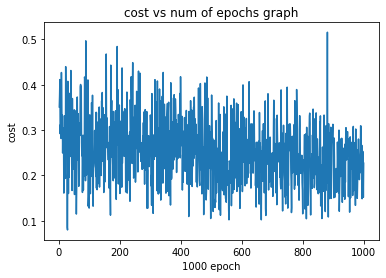

In [ ]:
miniBatchGradientDescent(standardizedX,Y,50,0.0001,1000)

#Running mini-batch gradient descent for 10000 epochs with 0.0001 learning rate

---



---



This is the intercept:  -0.5245795603595276
These are the 9 thetas:  [-0.09623696 -0.03118614 -0.0839047   0.09355731  0.02503088 -0.02763264
  0.02236959  0.08856733 -0.14306311]
This is the final value of the cost:  0.16709963729714505


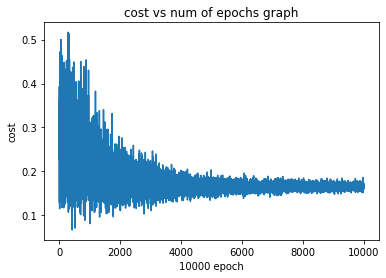

In [ ]:
miniBatchGradientDescent(standardizedX,Y,50,0.0001,10000)

#Running mini-batch gradient descent for 500 epochs with 0.001 learning rate

---



---



This is the intercept:  -0.4155797825567906
These are the 9 thetas:  [-0.15689693 -0.00592258 -0.14653887  0.18285187  0.04043862  0.01646043
  0.07293255  0.18496337 -0.11695268]
This is the final value of the cost:  0.16592409731258592


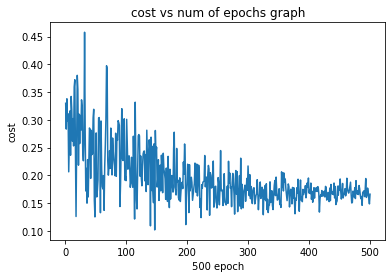

In [ ]:
miniBatchGradientDescent(standardizedX,Y,50,0.001,500)

#Running mini-batch gradient descent for 1000 epochs with 0.001 learning rate

---



---



This is the intercept:  -0.524990716873148
These are the 9 thetas:  [-0.09955504 -0.02573995 -0.08730813  0.09302589  0.02267358 -0.02772547
  0.02274558  0.09197653 -0.14280043]
This is the final value of the cost:  0.15831300285821534


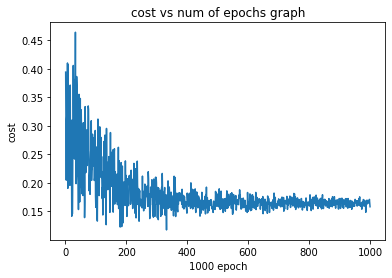

In [ ]:
miniBatchGradientDescent(standardizedX,Y,50,0.001,1000)

#Running mini-batch gradient descent for 10000 epochs with 0.001 learning rate

---



---



This is the intercept:  -0.6322857517344654
These are the 9 thetas:  [ 0.00204906  0.00486454  0.00548941  0.00044602 -0.00199543 -0.00503133
  0.00170155  0.00375226 -0.00769855]
This is the final value of the cost:  0.16546811748709062


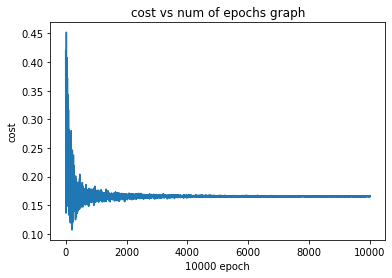

In [ ]:
miniBatchGradientDescent(standardizedX,Y,50,0.001,10000)

# Verification

---



---



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import seaborn as sns 

xWithNoBias = standardizedX[:,1:]
x_train, x_test, y_train, y_test = train_test_split(xWithNoBias, Y, test_size=0.2, random_state=42,shuffle=True)
logreg =  LogisticRegression(solver='liblinear') 
scaler = preprocessing.StandardScaler().fit(x_train)
classifier = (LogisticRegression())

X_scaled = scaler.transform(x_train)

classifier.fit(X_scaled,y_train) 

print(classifier.coef_)
print(classifier.intercept_)

[[-0.18286     0.06631658 -0.14392972 -0.35037203  0.08473466  0.0168465
  -0.07243705  0.35313691 -0.16948349]]
[-0.68785441]


# Answers to questions
Batch:

---


for batch gradient, I noticed that the best epochs for each learning rate is 10000 epochs, because they are the closest to the values gotten from sklearn's implementation, although 0.001 learning rate with 10000 epochs is the best and closest to sklearn's values. 0.0001 learning rate seems very slow and even 10000 epochs were not enough to get close answers to the ones gotten from sklearn's logistic regression implementation, thus, we need much more than 10000 epochs with 0.0001 learning rate to decrease the cost further.

Mini Batch:

---

For mini-batch gradient descent, for 0.0001 learning rate, 10000 epochs achieved the best results with the least cost compared to sklearn's implementation of log. reg., as for the 0.001 learning rate the cost seemed to stop decreasing after 1000 epochs with no noticable difference in cost between 1000 and 10000 epochs, thus 1000 epochs being the best for mini batch gradient descent with 0.001 learning rate.



